In [32]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook, push_notebook
from bokeh.models import ColumnDataSource, FactorRange, HoverTool
from bokeh.palettes import Viridis10

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
from IPython.display import display
from ipywidgets import interact, Button
import ipywidgets as widgets

In [3]:
import ast

In [4]:
output_notebook()

Loading BokehJS ...

In [45]:
url = 'https://docs.google.com/spreadsheets/d/1qJ1_vCAdCqjO00SxBgMEC4fM_Mxv4PQ4Mkss4w3mMTU/pub?gid=1503649435&single=true&output=csv'
df = pd.read_csv(url)
src = pd.DataFrame(df['Q1'].value_counts())
src = src.reset_index()
src = src.rename(columns = {'index':'q1','Q1':'freq'})
fr = FactorRange('foo','bar')
p = figure(title='Foo v. Bar',y_range=fr,x_range=(0,100),tools='xbox_zoom,reset',height=300,width=500)
hb = p.hbar(right='freq',y='q1',height=.5,source=ColumnDataSource(src))

# Please, if you don't mind

![qr-surveying](./qr-surveying.png)

In [6]:
def update_bar(b):
#     url = 'https://docs.google.com/spreadsheets/d/1qJ1_vCAdCqjO00SxBgMEC4fM_Mxv4PQ4Mkss4w3mMTU/pub?gid=1503649435&single=true&output=csv'
    df = pd.read_csv(url)
    src = pd.DataFrame(df['Q1'].value_counts())
    src = src.reset_index()
    src = src.rename(columns = {'index':'q1','Q1':'freq'})
    hb.data_source.data = ColumnDataSource(src).data
    push_notebook(handle=nh3)

b = Button(description='Update')
b.on_click(update_bar)
# display(b)

In [59]:
nh3 = show(p,notebook_handle=True)
display(b)

In [37]:
def proc_ages(row):
    you = row['Your Age']
    sibs = [you]
    for n in row['Ages'].split(','):
        if n:
            sibs.append(int(n))
    sibs.sort()
    data = (sibs, sibs.index(you),len(sibs),np.mean(sibs),Viridis10[len(sibs) - 1 - sibs.index(you)])
    index = ('Fam','BirthOrder','SibNo','FamAge',"BColor")
    return pd.Series(data,index=index)

In [47]:
procdf = df.join(df.fillna('').apply(proc_ages,axis=1)).rename(columns={'Your Age':'YourAge'})
cds = ColumnDataSource(procdf)
# procdf.head()

In [48]:
def explode_sibs(row):
    rows = []
    a = row.YourAge
    sib = row.Fam
    if sib:
        if a in sib: sib.remove(a)
        rows += [[a,s] for s in sib]
#     else:
#         rows += [[a,]]
#     return pd.DataFrame(rows,columns=['JMMer','Sib'])
    return rows

sibcirc = pd.DataFrame(procdf.copy().apply(explode_sibs,axis=1).sum(),columns=['JMMer','Sib'])

In [49]:
fam = figure(title='Birth Order of JMMers',tools='pan,box_zoom,reset',toolbar_location='above')
cc = fam.circle(x='YourAge',y='YourAge',radius='SibNo',source=cds, fill_alpha=.3,hover_color='BColor',hover_alpha=1)
hover = HoverTool(tooltips={
        'JMMer' : "@YourAge",
        "Siblings": "@Fam"
    },renderers =[cc])
cs = fam.circle(x='JMMer',y='Sib',radius=1,line_width=0,source=ColumnDataSource(sibcirc),hover_alpha=1,fill_alpha=.2,fill_color='#FF7777',hover_color='#FF7777')
hover2 = HoverTool(tooltips=None,renderers =[cs],mode='vline')
fam.add_tools(hover,hover2)

In [57]:
def update_scatter(b):
    #     url = 'https://docs.google.com/spreadsheets/d/1qJ1_vCAdCqjO00SxBgMEC4fM_Mxv4PQ4Mkss4w3mMTU/pub?gid=1503649435&single=true&output=csv'
    df = pd.read_csv(url)
    procdf = df.join(df.fillna('').apply(proc_ages,axis=1)).rename(columns={'Your Age':'YourAge'}) 
    sibcirc = pd.DataFrame(procdf.copy().apply(explode_sibs,axis=1).sum(),columns=['JMMer','Sib'])
    cc.data_source = ColumnDataSource(procdf)
    cs.data_source.data = ColumnDataSource(sibcirc).data
    push_notebook(handle=nh4)

b2 = Button(description='Update')
b2.on_click(update_scatter)

In [58]:
nh4 = show(fam,notebook_handle=True)
display(b2)

In [33]:
df.to_csv('sib_backup.csv')

In [61]:
df.head()

,Timestamp,Q1,Feels,Ages,Your Age
0,12/19/2016 23:35:14,foo,Great. Super.,"42,40, 39",18
1,12/19/2016 23:35:42,bar,Yes. Sure.,"13,45,4,12",25
2,12/19/2016 23:37:49,foo,NaN,"55,57",51
3,12/19/2016 23:37:53,bar,NaN,"43,47",45
4,12/19/2016 23:38:00,foo,NaN,14,44


In [62]:
from wordcloud import WordCloud, STOPWORDS

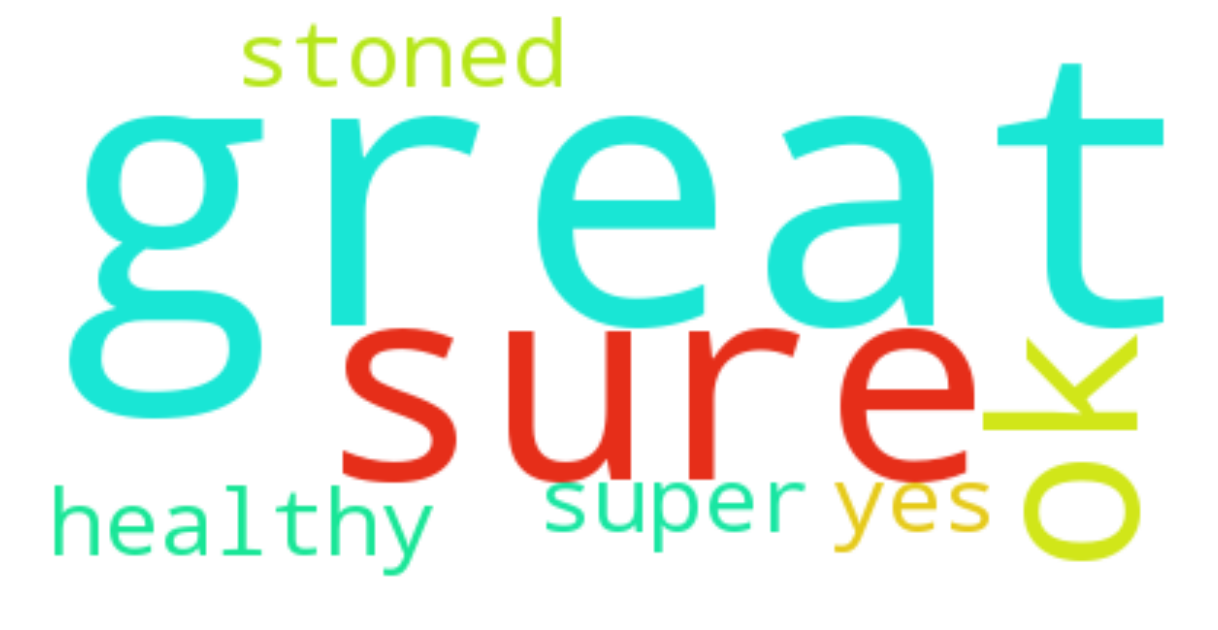

In [70]:
text = ' '.join(df.Feels.fillna('').tolist())
wordlist = [s.strip(".,?:;'") for s in text.lower().split()]
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(" ".join(wordlist))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Interactive scatterplots - from talk

In [ ]:
dfs = pd.read_csv("https://docs.google.com/spreadsheets/d/19_6rMgjDOl-_44Pqn5zGcDEU8n6cyOzpNmDR_wMKYeU/pub?gid=354149066&single=true&output=csv")
dfs = dfs[dfs.Bobst < 100]
def plot_scatter(x,y,s):
    fig,ax = plt.subplots(1,1)
    ax.scatter(dfs[x],dfs[y],s=10*dfs[s],c=np.hypot(dfs[x],dfs[y]),cmap='PuOr')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
#     return fig

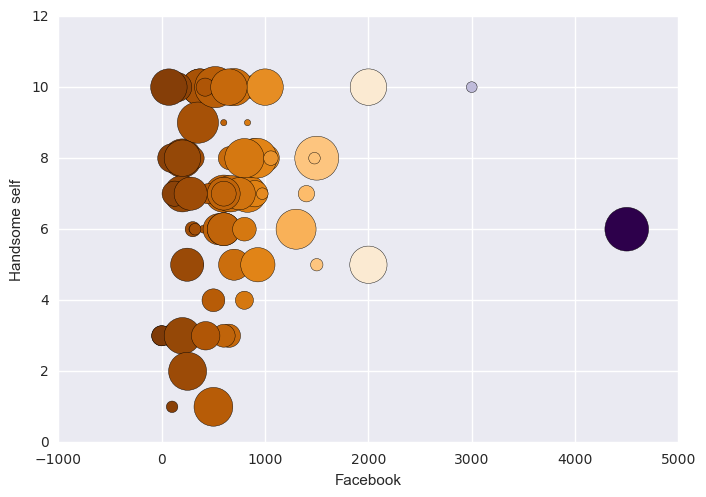

In [33]:
interact(plot_scatter,x=widgets.Dropdown(options=dfs.columns[1:].tolist()),
                 y=widgets.Dropdown(options=dfs.columns[1:].tolist(),value='Handsome self'),
                 s=widgets.Dropdown(options=dfs.columns[1:].tolist(),value='Caffeine'))

In [27]:
%matplotlib inline